In [1]:
using Statistics, Distributions, Plots

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1273


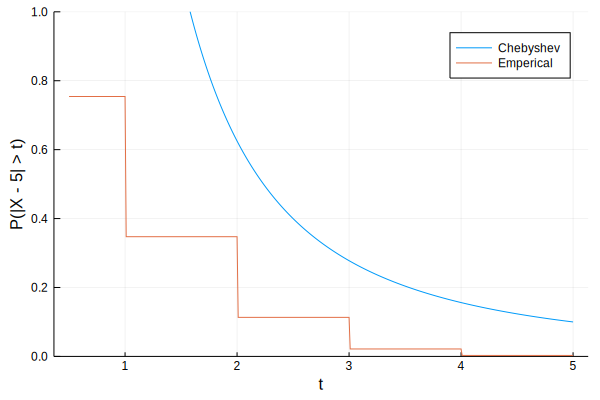

In [3]:
# number of trials
N = 10000
# distribution
d = Binomial(10, 0.5)
# get random samples
X = rand(d, N)
# probabilities
ts = 0.5:0.01:5
chebyshev = 2.5./(ts.^2)
T = length(ts)
emperical = zeros(T); Xn = abs.(X.-5);
for i = 1:length(ts)
    emperical[i] = count(x->(x>=ts[i]), Xn)/N
end
plot(ts, [chebyshev, emperical], 
    labels=["Chebyshev" "Emperical"], 
    ylims = (0,1),
    xlabel = "t", 
    ylabel = "P(|X - 5| > t)")

In [4]:
savefig("Chebyshev")

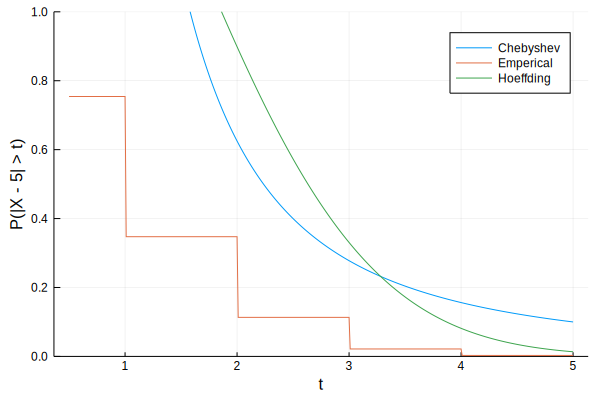

In [5]:
hoeffding = 2*exp.(-ts.^2/5)
plot(ts, [chebyshev, emperical, hoeffding], 
    labels=["Chebyshev" "Emperical" "Hoeffding"], 
    ylims = (0,1),
    xlabel = "t", 
    ylabel = "P(|X - 5| > t)")

In [6]:
savefig("Hoeffding")

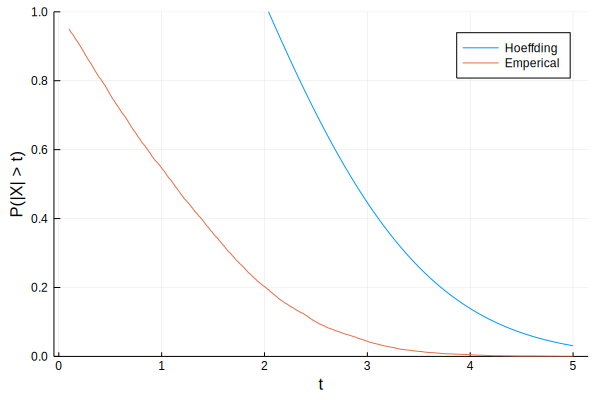

In [7]:
# number of trials
N = 10000
# distribution
d1 = Normal(0, 1)
d2 = Binomial(1, 0.5)
d3 = Uniform(-1, 1)
# get random samples
X1 = rand(d1, N)
X2 = 2*(rand(d2, N) .- 0.5)
X3 = rand(d3, N)
X = X1 + X2 + X3
# probabilities
ts = 0.1:0.01:5
T = length(ts)
emperical = zeros(T);
for i = 1:length(ts)
    emperical[i] = count(x->(abs(x)>=ts[i]), X)/N
end
hoeffding = 2*exp.(-ts.^2/6)
plot(ts, [hoeffding, emperical], 
    labels=["Hoeffding" "Emperical"], 
    ylims = (0,1),
    xlabel = "t", 
    ylabel = "P(|X| > t)")

In [8]:
savefig("Subgaussian")

In [16]:
using LinearAlgebra
n = 10; m = 10
# number of trials
N = 10000
# distribution
d = DiscreteUniform(1, m)
# function f
Im = Matrix(I, m, m); g(i) = Im[:,i]
function f(X)
    z = mapreduce(g, +, X)
    return count(j->j==0, z)
end
# Expectation
E = m*(1 - 1/m)^n
# for-loop
F = zeros(N)
for trial in 1:N
    X = rand(d, 10)
    F[trial] = abs(f(X)-E)
end

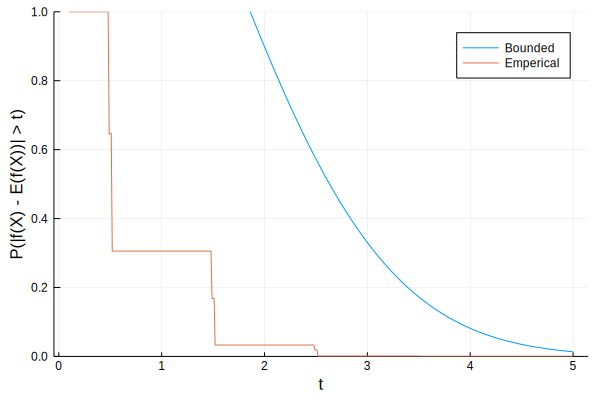

In [18]:
# probabilities
ts = 0.1:0.01:5
T = length(ts)
emperical = zeros(T);
for i = 1:length(ts)
    emperical[i] = count(x->x>=ts[i], F)/N
end
bounded = 2*exp.(-2*ts.^2/n)
plot(ts, [bounded, emperical], 
    labels=["Bounded" "Emperical"], 
    ylims = (0,1),
    xlabel = "t", 
    ylabel = "P(|f(X) - E(f(X))| > t)")

In [19]:
savefig("Bounded")